In [ ]:
from dotenv import load_dotenv
import os
load_dotenv()
import os
os.environ["GOOGLE_API_KEY"] = ""



In [33]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0
)

response = llm.invoke("What is the lateest stock price of Google?")
print(response.content)


I cannot provide the exact, real-time stock price for Google (Alphabet Inc.).  Stock prices change constantly.

To find the most up-to-the-minute price, you should check a reputable financial website such as:

* **Google Finance:**  Just search "Google stock" on Google.
* **Yahoo Finance:**  Search for GOOGL (Alphabet Class A) or GOOG (Alphabet Class C) on Yahoo Finance.
* **Bloomberg:**  Bloomberg provides in-depth financial data, but may require a subscription.
* **Your brokerage account:** If you have an online brokerage account, the current price will be displayed there.


Remember that the stock ticker symbols are usually GOOGL (for Alphabet Class A shares) and GOOG (for Alphabet Class C shares).  Make sure you're looking at the correct one.


#### Below are custom tools

In [34]:
from langchain.tools import tool

In [ ]:
@tool
def multiply(a: int, b:int)->int:
    """function to multiply"""
    return a*b

In [ ]:
@tool
def add(a: int, b:int)->int:
    """ function to add"""
    return a+b


In [51]:
@tool
def divide(a:int, b:int)->float:
    """tool to divide"""
    if b==0:
        raise ValueError("Denominator cannot be zero")
    return a/b

#### Below is the inbuilt tool

In [42]:
from langchain_community.tools import DuckDuckGoSearchRun # duckduckgo gives summary of the result where tavly gices raw result

In [49]:
search = DuckDuckGoSearchRun()
search.invoke("Tell me who won IPL 2025")

"IPL 2025, PBKS vs RCB Match Report: An 18-year wait for a first trophy ended on Tuesday night thanks to key contributions from Krunal Pandya and Bhuvneshwar Kumar RCB are IPL 2025 champions! After 18 long years, Royal Challengers Bangalore lift their first IPL trophy in a thrilling, emotional victory. RCB triumphed in IPL 2025, beating Punjab Kings by six runs in the final. Bengaluru scored 190/9, while Punjab fell short at 184/7 at Ahmedabad. Royal Challengers Bengaluru defeated Punjab Kings in a thrilling IPL 2025 final. RCB secured their first-ever IPL title after an 18-year wait. The match went down to the wire, with RCB winning by 6 runs. Krunal Pandya was named Man of the Match for his economical bowling. Shashank Singh's brilliant knock went in vain. Royal Challengers Bengaluru (RCB) clinched the IPL 2025 title, ending an 11-year wait to become champions in the 18th TATA IPL edition. Explore their stellar team performance, key players, and ..."

In [50]:
tools=[multiply, add, divide, search]

In [52]:
llm_with_tools = llm.bind_tools(tools)

In [ ]:
response = llm_with_tools.invoke("Hi")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--23201693-0a7b-48b5-b277-6c8a43f79cf1-0', usage_metadata={'input_tokens': 75, 'output_tokens': 10, 'total_tokens': 85, 'input_token_details': {'cache_read': 0}})

In [54]:
response.content

'I cannot provide the exact, real-time stock price for Google (Alphabet Inc.).  Stock prices change constantly.\n\nTo find the most up-to-the-minute price, you should check a reputable financial website such as:\n\n* **Google Finance:**  Just search "Google stock" on Google.\n* **Yahoo Finance:**  Search for GOOGL (Alphabet Class A) or GOOG (Alphabet Class C) on Yahoo Finance.\n* **Bloomberg:**  Bloomberg provides in-depth financial data, but may require a subscription.\n* **Your brokerage account:** If you have an online brokerage account, the current price will be displayed there.\n\n\nRemember that the stock ticker symbols are usually GOOGL (for Alphabet Class A shares) and GOOG (for Alphabet Class C shares).  Make sure you\'re looking at the correct one.'

In [55]:
response.tool_calls

[]

In [58]:
response = llm_with_tools.invoke("Hi, can you add two numbers like 5 and 10")

In [59]:
response.content

''

In [60]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 5.0, 'b': 10.0},
  'id': '06d6d74c-4e0f-4f2b-a3d4-65d693ab2363',
  'type': 'tool_call'}]

In [63]:
response = llm_with_tools.invoke("Can you  tell me what is weather today in ahaus, germany")

In [64]:
response.content

'I am sorry, I cannot fulfill this request. The available tools lack the functionality to access real-time weather information.'

In [62]:
response.tool_calls

[]

In [67]:
response = llm_with_tools.invoke("what is the current age of TATA Group")

In [68]:
response.content

'I cannot directly answer this question.  I do not have access to real-time information, including the current age of a company like the Tata Group.  To find this information, I suggest searching online using a search engine like Google, DuckDuckGo, or Bing.'

In [69]:
response.tool_calls

[]

In [119]:
from langgraph.graph import StateGraph, MessagesState, END, START
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.prebuilt import ToolNode, tools_condition

In [120]:
state = StateGraph(MessagesState)

In [129]:
def function_1(MessagesState):
    llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash", 
    temperature=0
    )
    response = llm.invoke(MessagesState[-1])
    return response

In [122]:
state.add_node("supervisor", function_1)

In [123]:
state.add_node("tools", ToolNode(tools))

In [124]:
state.add_edge(START, "supervisor")

In [125]:
state.add_conditional_edges("supervisor",
                            tools_condition)

In [126]:
state.add_edge("tools", "supervisor")

In [127]:
react_graph = state.compile()

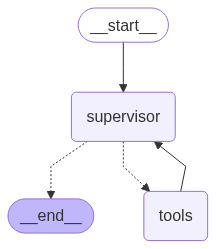

In [128]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))